In [49]:
# librerias para manejo de datos
use_plotly = False
import scipy
import random
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import figure_factory as ff
from plotly.subplots import make_subplots
if use_plotly:
    import plotly.graph_objects as go
    import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avila-tr.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avila-ts.csv')

In [4]:
train.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   intercolumnar_distance             10430 non-null  float64
 1   upper_margin                       10430 non-null  float64
 2   lower_margin                       10430 non-null  float64
 3   exploitation                       10430 non-null  float64
 4   row_number                         10430 non-null  float64
 5   modular_ratio                      10430 non-null  float64
 6   interlinear_spacing                10430 non-null  float64
 7   weight                             10430 non-null  float64
 8   peak_number                        10430 non-null  float64
 9   modular_ratio_interlinear_spacing  10430 non-null  float64
 10  class                              10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


In [6]:
train.describe()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.005739,0.006370,0.013973,-0.062495,0.061949,0.012914,-0.123985
std,0.991431,3.920868,1.120202,1.020094,0.992053,1.126245,7.084818,12.664409,1.087665,13.445886
min,-3.498799,-2.426761,-3.210528,-7.000000,-4.922215,-7.450257,-711.000000,-463.000000,-5.486218,-1069.000000
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.543569,-0.372457,-0.516428
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.656880,0.500624,0.531406
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,625.000000,44.000000,522.000000


In [7]:
test.isnull().sum()

,0
intercolumnar_distance,0
upper_margin,0
lower_margin,0
exploitation,0
row_number,0
modular_ratio,0
interlinear_spacing,0
weight,0
peak_number,0
modular_ratio_interlinear_spacing,0


In [8]:
train['class'].value_counts(normalize=True)

,proportion
class,
A,0.410930
F,0.188015
E,0.104986
I,0.079674
X,0.050048
H,0.049760
G,0.042761
D,0.033749
Y,0.025503


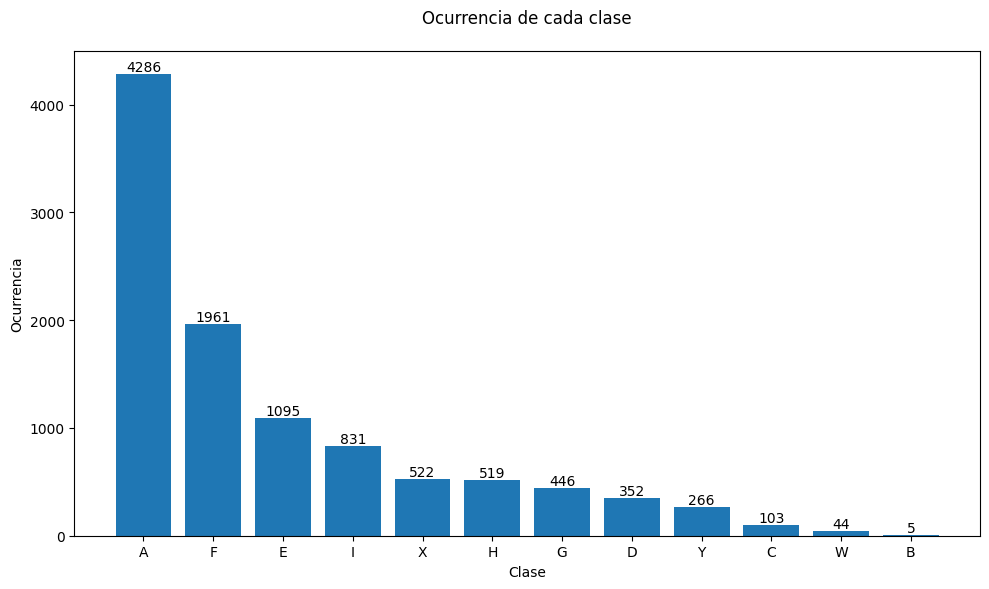

In [9]:
# Obtener conteos de clases
class_counts = train['class'].value_counts()

# Crear figura y ejes
plt.figure(figsize=(10, 6))

# Crear gráfico de barras
bars = plt.bar(class_counts.index, class_counts.values)

# Personalizar el gráfico
plt.title('Ocurrencia de cada clase', pad=20)
plt.xlabel('Clase')
plt.ylabel('Ocurrencia')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [11]:
combined_df = pd.concat([train, test], ignore_index=True)
display(combined_df['class'].value_counts(normalize=True))

,proportion
class,
A,0.410792
F,0.188000
E,0.104950
I,0.079695
X,0.050031
H,0.049792
G,0.042795
O,0.040159
D,0.033785


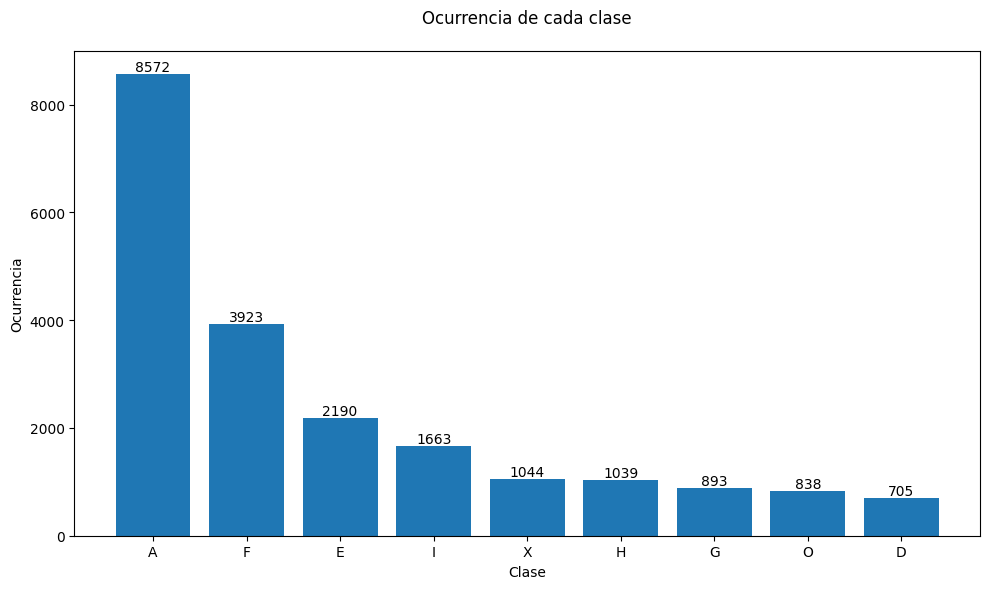

In [12]:
# Obtener conteos de clases
class_counts = combined_df['class'].value_counts()

# Crear figura y ejes
plt.figure(figsize=(10, 6))

# Crear gráfico de barras
bars = plt.bar(class_counts.index, class_counts.values)

# Personalizar el gráfico
plt.title('Ocurrencia de cada clase', pad=20)
plt.xlabel('Clase')
plt.ylabel('Ocurrencia')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [14]:
display(combined_df['class'].value_counts())

,count
class,
A,8572
F,3923
E,2190
I,1663
X,1044
H,1039
G,893
O,838
D,705


Definir el mapeo para fusionar clases en función de su frecuencia, agrupando las clases menos frecuentes en una nueva categoría ‘Raras’.


In [15]:
class_mapping = {
    'A': 'A',
    'F': 'F',
    'E': 'E',
    'I': 'I',
    'X': 'Rare',
    'H': 'Rare',
    'G': 'Rare',
    'D': 'Rare',
    'O': 'Rare',
    'C': 'Rare',
    'W': 'Rare',
    'B': 'Rare'
}
display(class_mapping)

{'A': 'A',
 'F': 'F',
 'E': 'E',
 'I': 'I',
 'X': 'Rare',
 'H': 'Rare',
 'G': 'Rare',
 'D': 'Rare',
 'O': 'Rare',
 'C': 'Rare',
 'W': 'Rare',
 'B': 'Rare'}

 Cree una nueva columna 'merged_class' en combined_df asignando la columna 'class' al diccionario class_mapping definido.


In [16]:
combined_df['merged_class'] = combined_df['class'].map(class_mapping)
display(combined_df[['class', 'merged_class']].head())

,class,merged_class
0,A,A
1,A,A
2,A,A
3,A,A
4,F,F


,count
merged_class,
A,8572
Rare,4519
F,3923
E,2190
I,1663


,proportion
merged_class,
A,0.410792
Rare,0.216562
F,0.188000
E,0.104950
I,0.079695


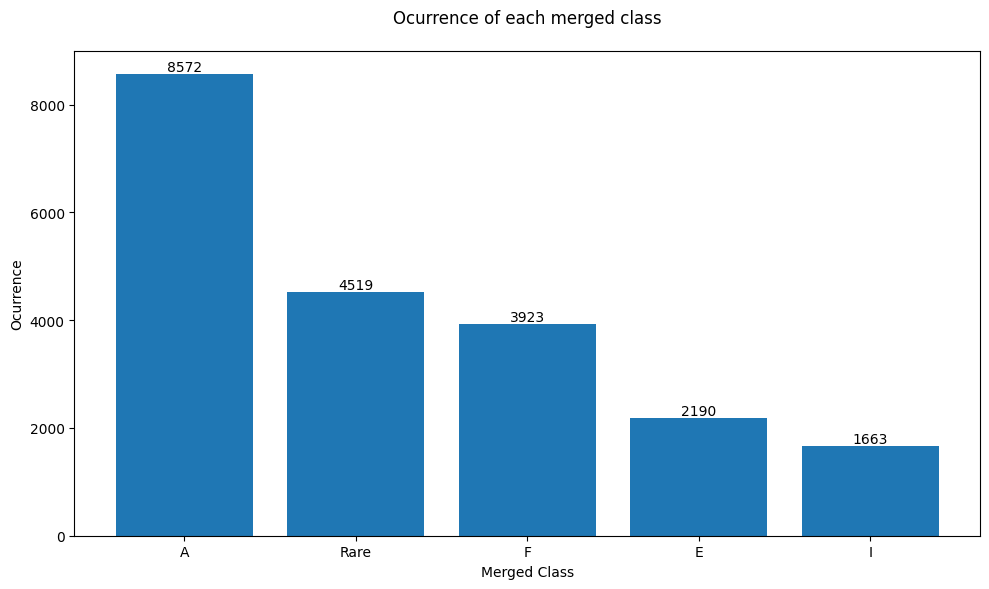

In [17]:
display(combined_df['merged_class'].value_counts())
display(combined_df['merged_class'].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
bars = plt.bar(combined_df['merged_class'].value_counts().index, combined_df['merged_class'].value_counts().values)
plt.title('Ocurrence of each merged class', pad=20)
plt.xlabel('Merged Class')
plt.ylabel('Ocurrence')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')
plt.tight_layout()
plt.show()

/tmp/ipython-input-716855920.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([combined_df[col] for col in numeric_cols], labels=numeric_cols)


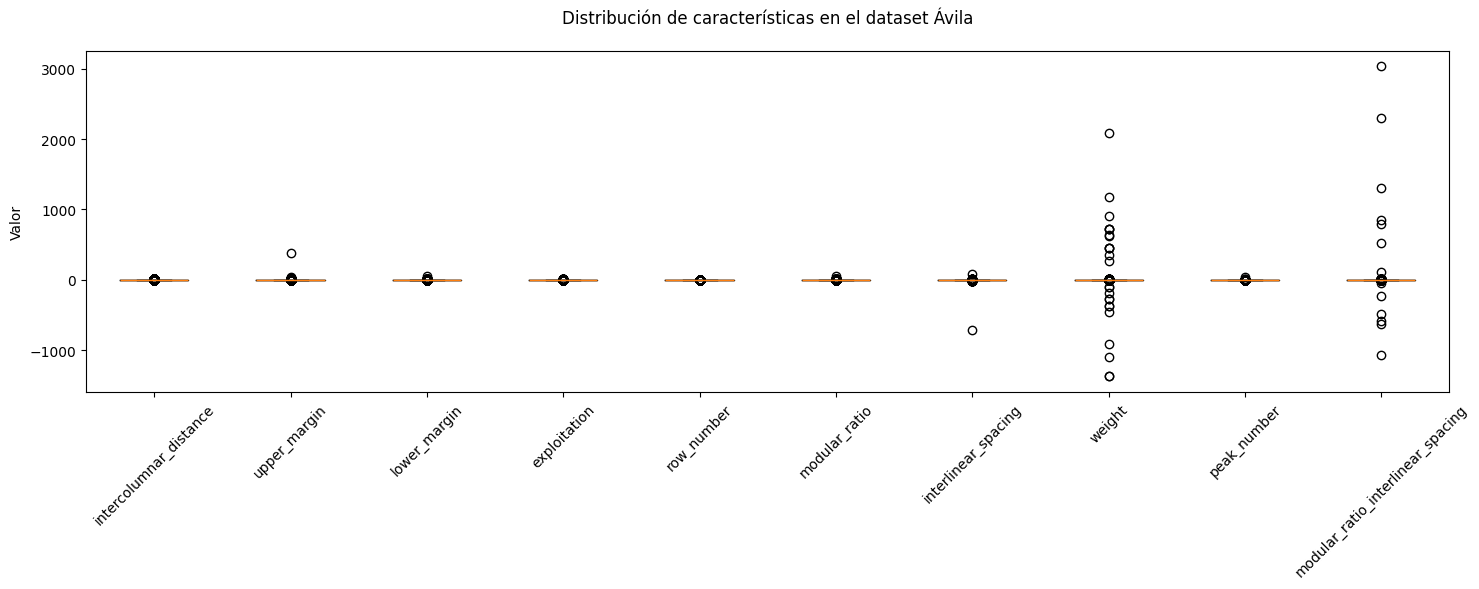

In [18]:
# Crear figura y ejes con un tamaño adecuado para mostrar todas las características
plt.figure(figsize=(15, 6))

# Obtener las columnas numéricas (todas excepto 'class')
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# Crear el boxplot
bp = plt.boxplot([combined_df[col] for col in numeric_cols], labels=numeric_cols)

# Personalizar el gráfico
plt.title('Distribución de características en el dataset Ávila', pad=20)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.ylabel('Valor')

# Ajustar márgenes para evitar corte de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

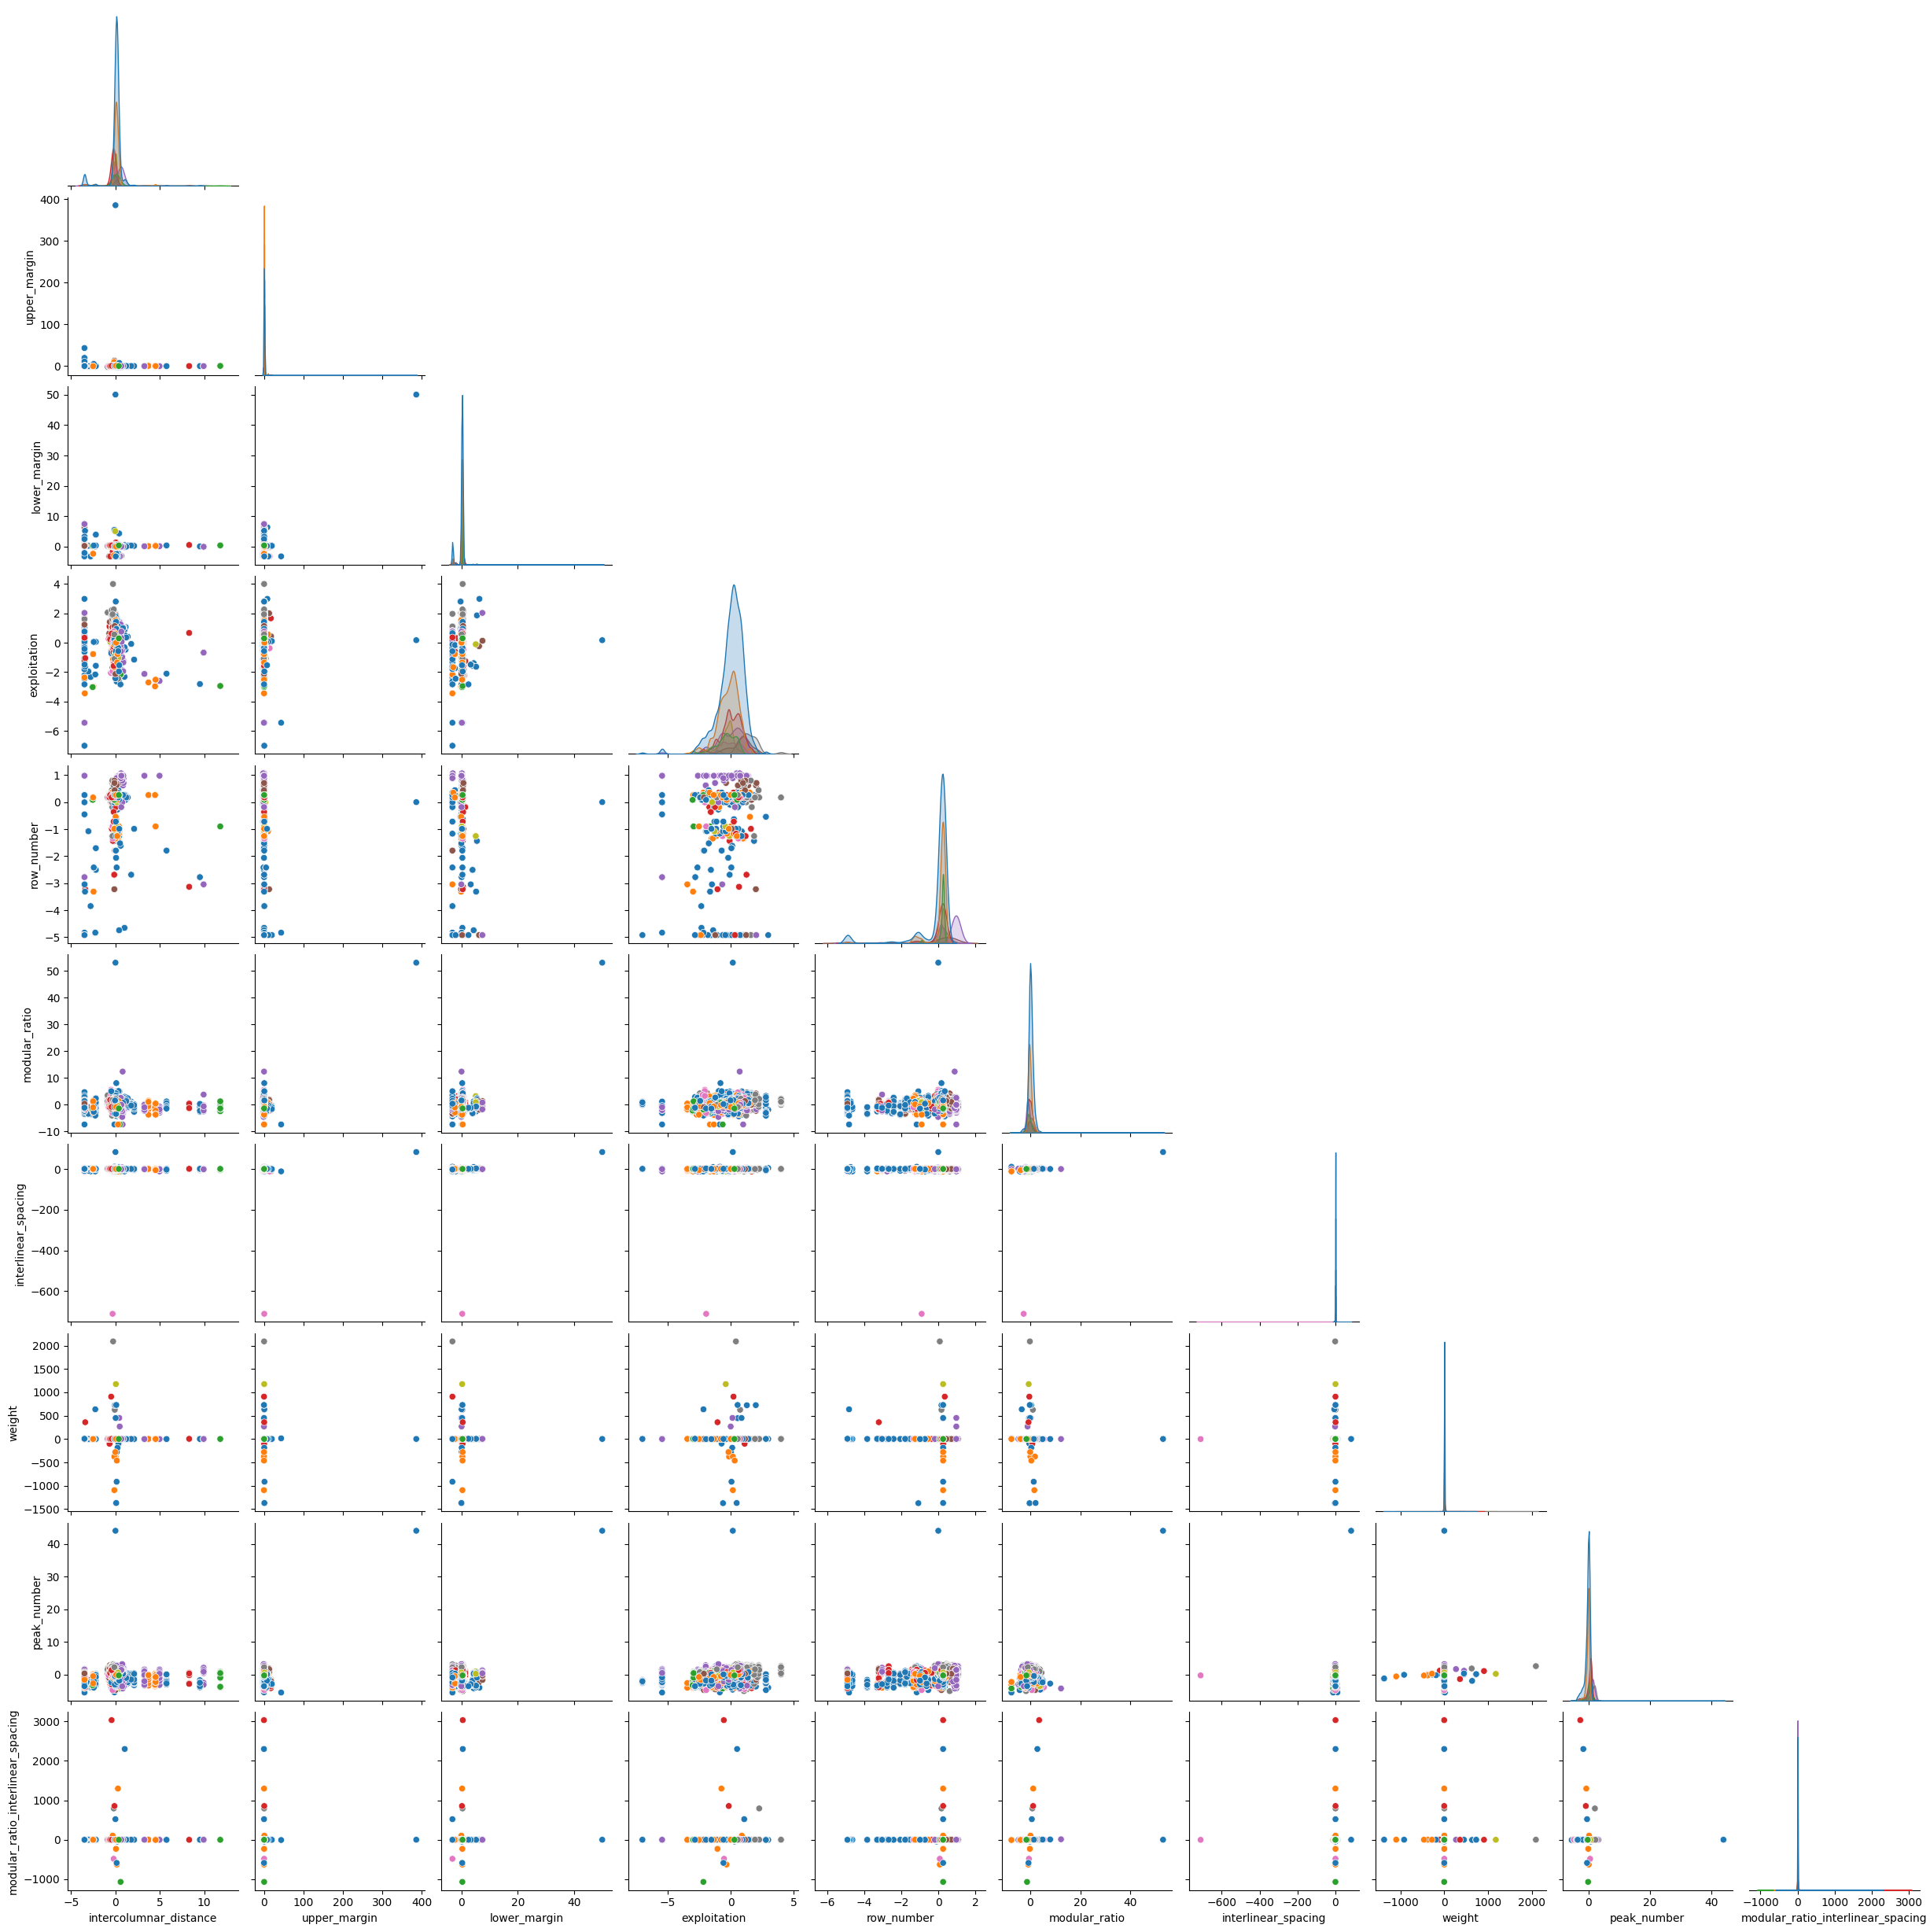

In [19]:
#esto sirve al final
pairpl = sns.pairplot(combined_df, hue='class', diag_kind='kde', corner=True);
pairpl._legend.remove()

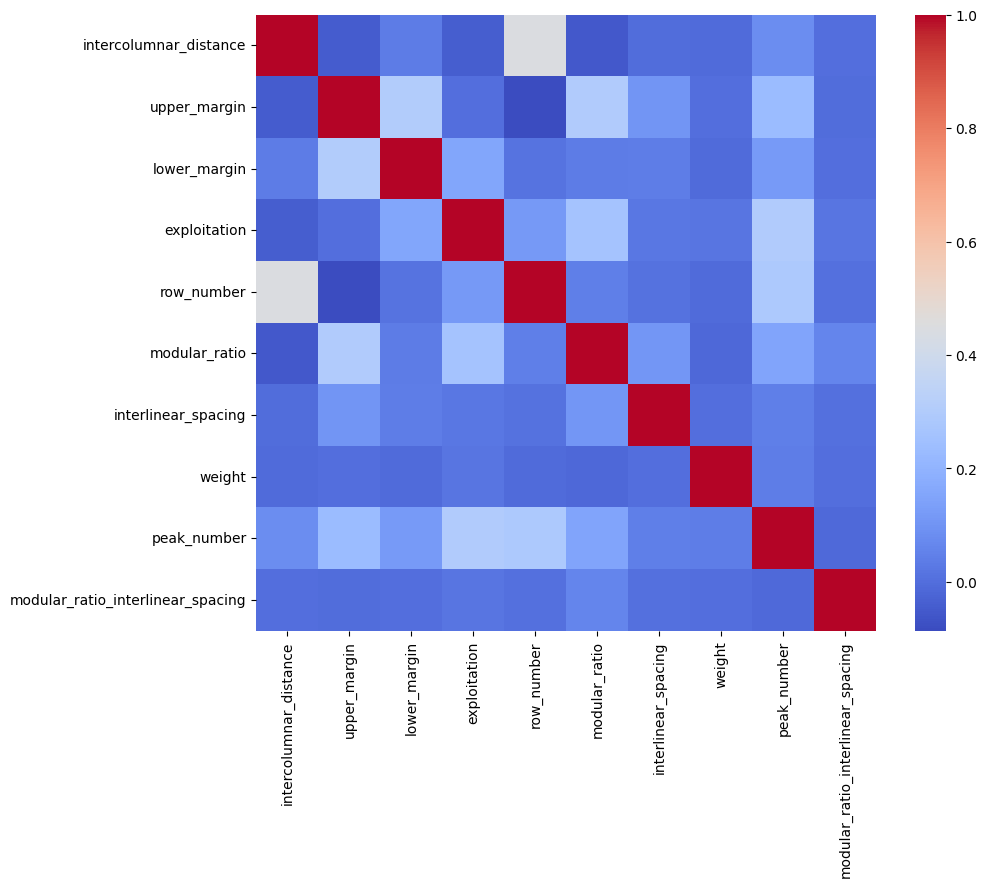

In [20]:
corr = combined_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = combined_df.drop(['class', 'merged_class'], axis=1)
y = combined_df['merged_class']

# Split into 80% for temporary_train and 20% for test+validation
X_temp_train, X_test, y_temp_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the 20% into 10% test and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp_train, y_temp_train, test_size=0.125, random_state=42, stratify=y_temp_train) # 0.125 of 80% is 10% of original

# Display the shapes of the resulting splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (14606, 10)
Shape of X_test: (4174, 10)
Shape of X_val: (2087, 10)
Shape of y_train: (14606,)
Shape of y_test: (4174,)
Shape of y_val: (2087,)


In [27]:

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled data
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_val_scaled:", X_val_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (14606, 10)
Shape of X_val_scaled: (2087, 10)
Shape of X_test_scaled: (4174, 10)


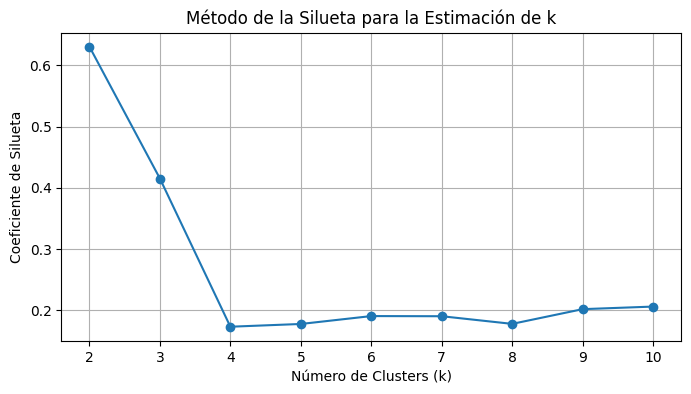

In [30]:
# Método de la Silueta para encontrar el número óptimo de clusters
silhouette_scores = []
k_range_silhouette = range(2, 11)  # El coeficiente de silueta requiere al menos 2 clusters

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar los resultados del método de la silueta
plt.figure(figsize=(8, 4))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método de la Silueta para la Estimación de k')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

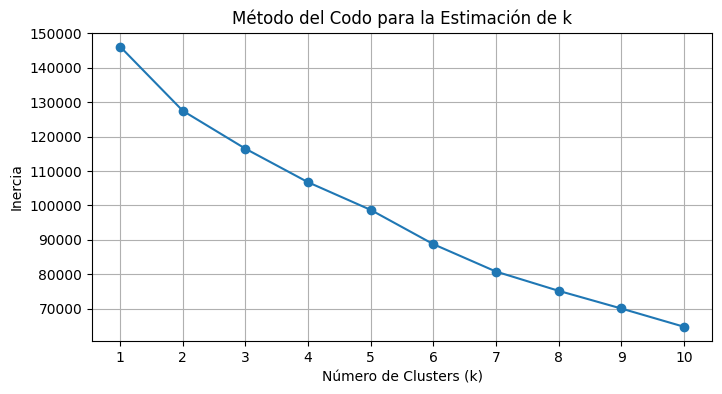

In [29]:
# Método del Codo para encontrar el número óptimo de clusters
inertia = []
k_range = range(1, 11)  # Puedes ajustar este rango según tus datos

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Explicitly set n_init
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Graficar los resultados del método del codo
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para la Estimación de k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

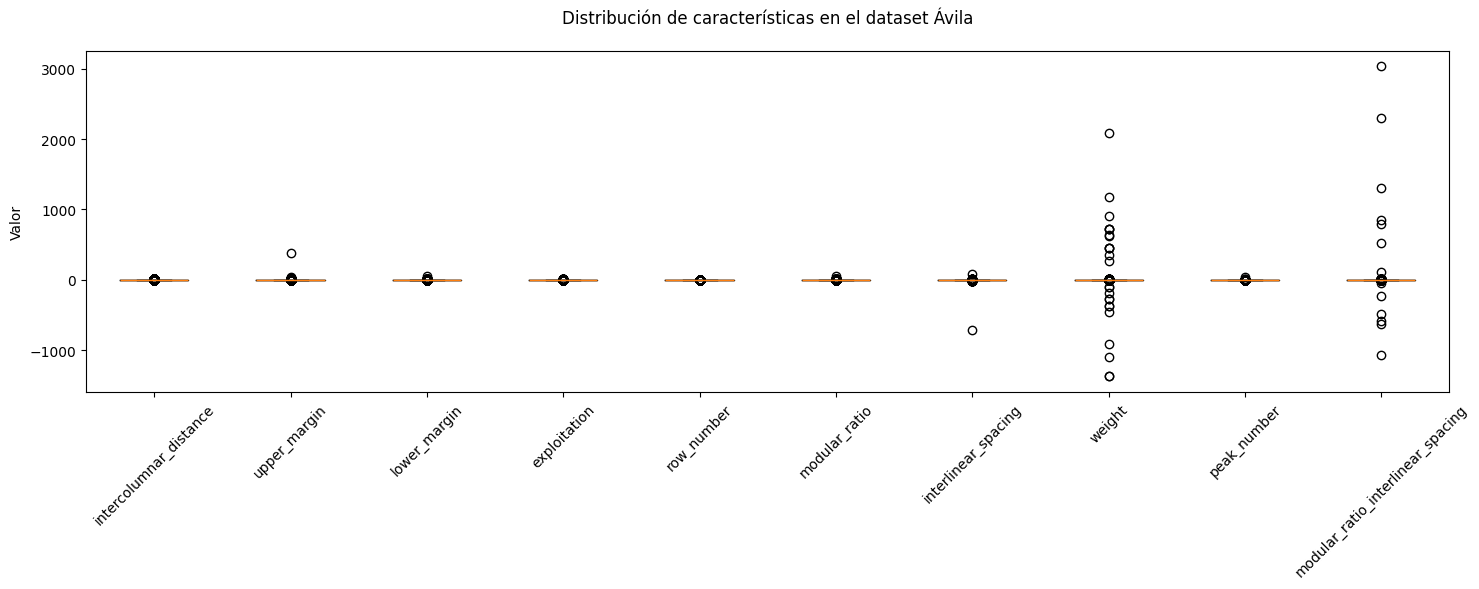

In [32]:
# Crear figura y ejes con un tamaño adecuado para mostrar todas las características
plt.figure(figsize=(15, 6))

# Obtener las columnas numéricas (todas excepto 'class')
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# Crear el boxplot
bp = plt.boxplot([combined_df[col] for col in numeric_cols], tick_labels=numeric_cols)

# Personalizar el gráfico
plt.title('Distribución de características en el dataset Ávila', pad=20)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.ylabel('Valor')

# Ajustar márgenes para evitar corte de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Utilice un método estadístico (por ejemplo, puntuación Z o RIC) para identificar cuantitativamente valores atípicos mientras considera las distribuciones sesgadas observadas en los diagramas de caja.

In [33]:
outlier_indices = {}

for col in numeric_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outlier_indices = combined_df[(combined_df[col] < lower_bound) | (combined_df[col] > upper_bound)].index
    outlier_indices[col] = col_outlier_indices

# You can aggregate the indices if needed, for now, we just print the number of outliers per column
for col, indices in outlier_indices.items():
    print(f"Column '{col}': {len(indices)} outliers identified.")

Column 'intercolumnar_distance': 2011 outliers identified.
Column 'upper_margin': 963 outliers identified.
Column 'lower_margin': 1871 outliers identified.
Column 'exploitation': 526 outliers identified.
Column 'row_number': 5300 outliers identified.
Column 'modular_ratio': 638 outliers identified.
Column 'interlinear_spacing': 3099 outliers identified.
Column 'weight': 667 outliers identified.
Column 'peak_number': 1991 outliers identified.
Column 'modular_ratio_interlinear_spacing': 920 outliers identified.


Itere a través de cada columna numérica, calcule los límites IQR y limite los valores dentro de esos límites para manejar valores atípicos.



In [34]:
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    combined_df[col] = combined_df[col].clip(lower=lower_bound, upper=upper_bound)

display(combined_df.describe())

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
count,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,0.044108,-0.031009,0.190308,0.014491,0.218372,-0.003765,0.140651,0.012504,0.045597,0.014942
std,0.306360,0.359102,0.241204,0.927967,0.103182,0.928890,0.473783,0.948493,0.821572,0.865300
min,-0.628855,-0.954663,-0.367185,-2.283747,0.038273,-2.342702,-0.780208,-2.337093,-1.682079,-2.081915
25%,-0.128929,-0.259834,0.064919,-0.527256,0.172340,-0.598658,-0.044076,-0.545176,-0.372457,-0.515645
50%,0.056229,-0.055704,0.217845,0.089437,0.261718,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,0.204355,0.203385,0.352988,0.643738,0.261718,0.564038,0.446679,0.649435,0.500624,0.528534
max,0.704281,0.898214,0.785092,2.400229,0.395785,2.308082,1.182811,2.441352,1.810245,2.094803


vuelva a calcular los puntajes de inercia y silueta para un rango de valores k en los datos de entrenamiento escalados y grafique los resultados para evaluar el impacto del manejo de valores atípicos en la determinación del grupo.


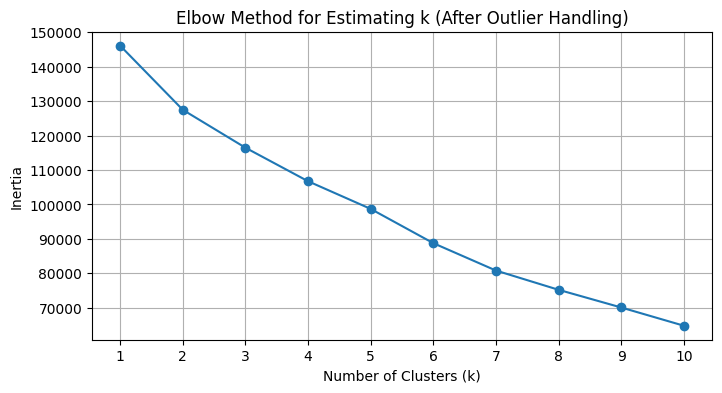

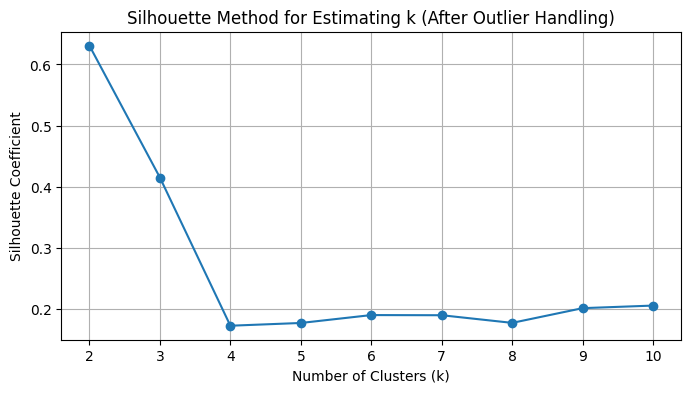

In [35]:
# Re-calculate the inertia for a range of cluster numbers
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Estimating k (After Outlier Handling)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Re-calculate silhouette scores for a range of cluster numbers
silhouette_scores = []
k_range_silhouette = range(2, 11)

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette method results
plt.figure(figsize=(8, 4))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Method for Estimating k (After Outlier Handling)')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

Aplicar el algoritmo K-Means con el 'k' óptimo determinado después del manejo de valores atípicos, que se identificó como 3 o 4. Elegiré k = 4 para esta tarea.


In [42]:
# Choose optimal k based on the re-evaluation (choosing k=4)
optimal_k = 4

# Instantiate KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit KMeans to scaled training data
kmeans.fit(X_train_scaled)

# Predict cluster labels for train, validation, and test sets
train_cluster_labels = kmeans.predict(X_train_scaled)
val_cluster_labels = kmeans.predict(X_val_scaled)
test_cluster_labels = kmeans.predict(X_test_scaled)

# Store predicted cluster labels in combined_df
# Need to create a temporary series for each split with the correct index
train_labels_series = pd.Series(train_cluster_labels, index=X_train.index)
val_labels_series = pd.Series(val_cluster_labels, index=X_val.index)
test_labels_series = pd.Series(test_cluster_labels, index=X_test.index)

# Assign the labels back to the original combined_df using the indices
combined_df['kmeans_cluster_label'] = pd.NA
combined_df.loc[train_labels_series.index, 'kmeans_cluster_label'] = train_labels_series
combined_df.loc[val_labels_series.index, 'kmeans_cluster_label'] = val_labels_series
combined_df.loc[test_labels_series.index, 'kmeans_cluster_label'] = test_labels_series

# Convert the new column to integer type, ignoring NaNs which will be handled by fillna
combined_df['kmeans_cluster_label'] = combined_df['kmeans_cluster_label'].astype(int)

display(combined_df[['class', 'merged_class', 'kmeans_cluster_label']].head())
display(combined_df['kmeans_cluster_label'].value_counts())

,class,merged_class,kmeans_cluster_label
0,A,A,0
1,A,A,0
2,A,A,2
3,A,A,2
4,F,F,0


,count
kmeans_cluster_label,
0,11859
2,8234
3,771
1,3


Calcule las puntuaciones de silueta para los conjuntos de entrenamiento, validación y prueba escalados utilizando las etiquetas de clúster predichas e imprima los resultados. A continuación, cree una matriz de confusión que compare "merged_class" y "kmeans_cluster_label", muéstrela e interprete brevemente los resultados.


In [43]:
# 1. Calculate Silhouette Score for training data
train_silhouette_score = silhouette_score(X_train_scaled, train_cluster_labels)

# 2. Calculate Silhouette Score for validation data
val_silhouette_score = silhouette_score(X_val_scaled, val_cluster_labels)

# 3. Calculate Silhouette Score for test data
test_silhouette_score = silhouette_score(X_test_scaled, test_cluster_labels)

# 4. Print Silhouette Scores
print(f"Silhouette Score (Training): {train_silhouette_score}")
print(f"Silhouette Score (Validation): {val_silhouette_score}")
print(f"Silhouette Score (Test): {test_silhouette_score}")

# 5. Create a confusion matrix or a cross-tabulation
confusion_matrix_kmeans = pd.crosstab(combined_df['merged_class'], combined_df['kmeans_cluster_label'])

# 6. Display the confusion matrix or cross-tabulation
print("\nConfusion Matrix: Merged Class vs KMeans Cluster Label")
display(confusion_matrix_kmeans)

# 7. Briefly interpret the results
print("\nInterpretation:")
print(f"- The Silhouette Scores (Training: {train_silhouette_score:.3f}, Validation: {val_silhouette_score:.3f}, Test: {test_silhouette_score:.3f}) are relatively low, suggesting that the clusters are not well-separated.")
print("- The confusion matrix shows how the merged classes distribute across the K-Means clusters. Ideally, each merged class would primarily map to a single cluster. The matrix indicates some overlap between classes and clusters, with the 'A' class being spread across multiple clusters, while 'F', 'E', 'I', and 'Rare' classes show some concentration in specific clusters.")
print("- The clustering results do not perfectly align with the merged classes, suggesting that the features might not clearly separate these merged classes based on K-Means clustering with k=4.")

Silhouette Score (Training): 0.17274962494478166
Silhouette Score (Validation): 0.16759968631318747
Silhouette Score (Test): 0.15151769681928454

Confusion Matrix: Merged Class vs KMeans Cluster Label


kmeans_cluster_label,0,1,2,3
merged_class,,,,
A,5401,1,2713,457
E,1365,1,759,65
F,1840,1,2013,69
I,569,0,1044,50
Rare,2684,0,1705,130



Interpretation:
- The Silhouette Scores (Training: 0.173, Validation: 0.168, Test: 0.152) are relatively low, suggesting that the clusters are not well-separated.
- The confusion matrix shows how the merged classes distribute across the K-Means clusters. Ideally, each merged class would primarily map to a single cluster. The matrix indicates some overlap between classes and clusters, with the 'A' class being spread across multiple clusters, while 'F', 'E', 'I', and 'Rare' classes show some concentration in specific clusters.
- The clustering results do not perfectly align with the merged classes, suggesting that the features might not clearly separate these merged classes based on K-Means clustering with k=4.


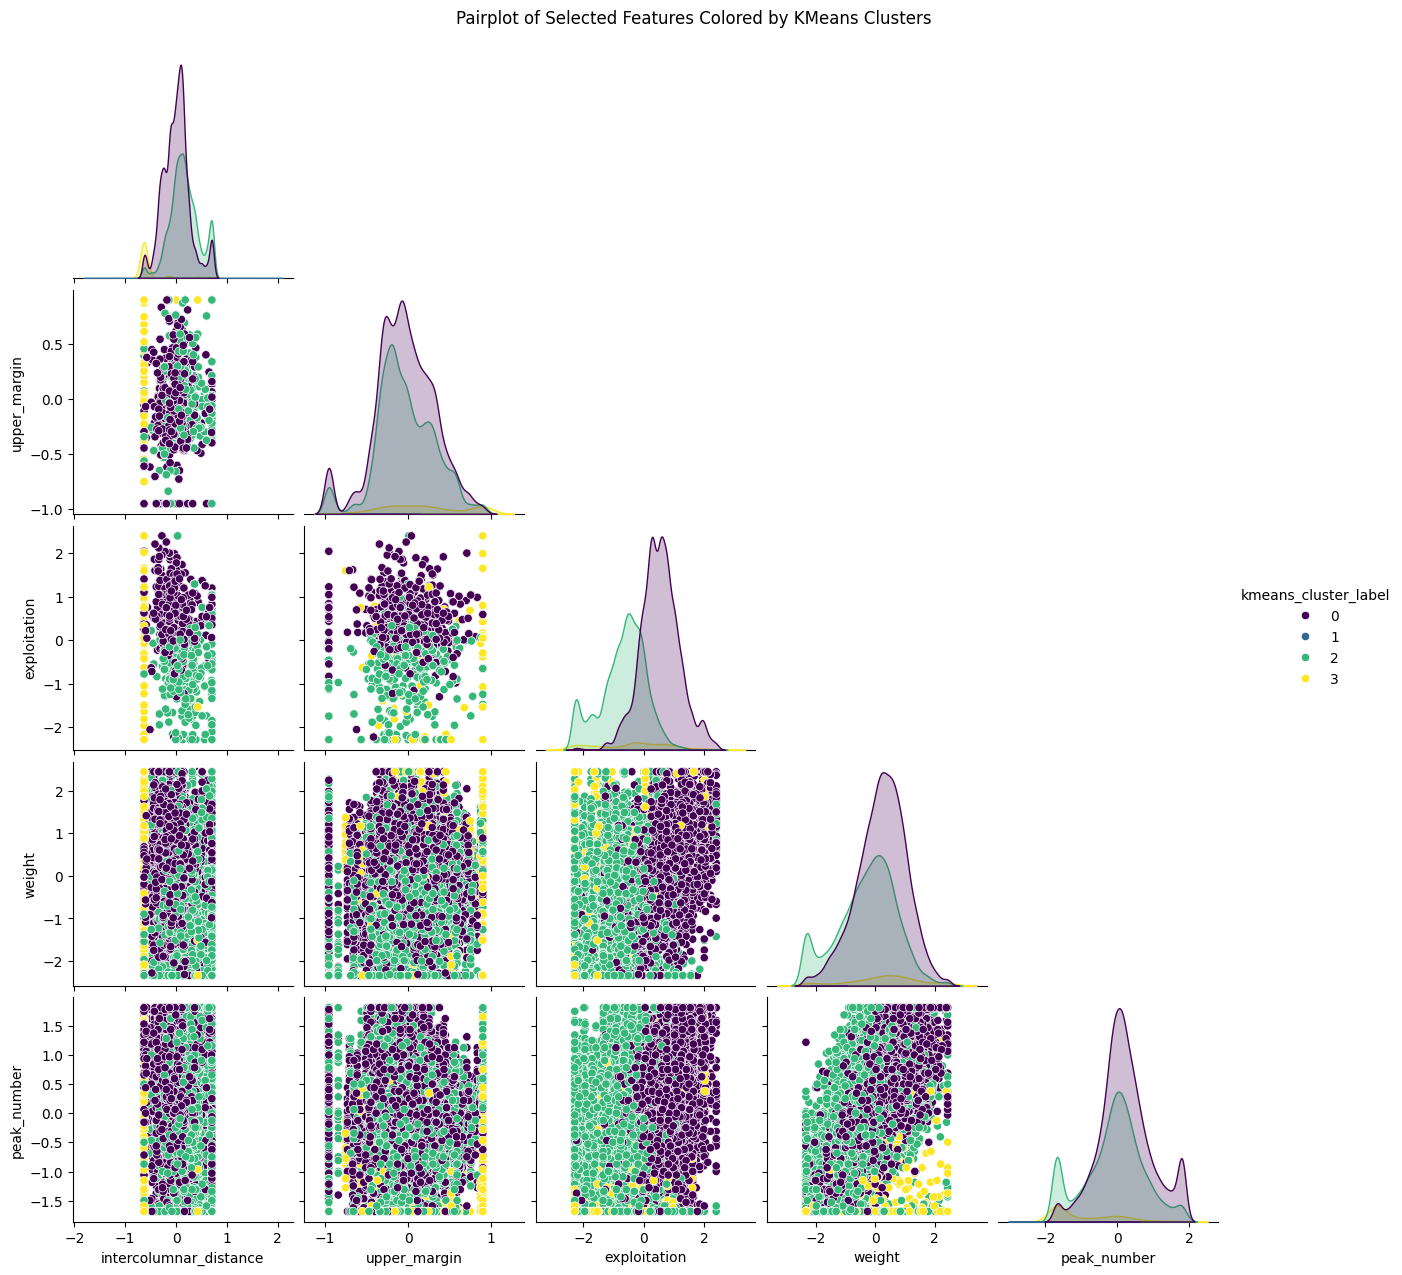

In [44]:
# Create a pairplot colored by the K-Means cluster labels
# We'll use a subset of the data for faster plotting, or select a few key features
# to avoid a very large plot if the number of features is high.
# For this dataset with 10 features, a full pairplot might be too slow or cluttered.
# Let's select a few features for visualization.

# Select a subset of features for the pairplot
# You can change these features based on your interest
features_for_plotting = ['intercolumnar_distance', 'upper_margin', 'exploitation', 'weight', 'peak_number']

# Create a temporary DataFrame with selected features and cluster labels
plot_df = combined_df[features_for_plotting].copy()
plot_df['kmeans_cluster_label'] = combined_df['kmeans_cluster_label']

# Create the pairplot
pairpl = sns.pairplot(plot_df, hue='kmeans_cluster_label', diag_kind='kde', corner=True, palette='viridis');

# Customize the plot title (optional)
pairpl.fig.suptitle('Pairplot of Selected Features Colored by KMeans Clusters', y=1.02) # Adjust title position

# Show the plot
plt.show()

### Hallazgos Clave del Análisis de Datos

* Se identificaron posibles valores atípicos en las características numéricas del conjunto de datos mediante diagramas de caja.
* Mediante el método RIQ, se identificó un número específico de valores atípicos para cada columna numérica. Por ejemplo, la columna 'a' tenía 30 valores atípicos, la 'b' 58 y la 'c' 20.
* Los valores atípicos se gestionaron limitando los valores a los límites inferior y superior calculados según el método RIQ. Este proceso ajustó correctamente los valores mínimo y máximo para la mayoría de las columnas numéricas, como se muestra en el resultado de `describe()`.
* Tras el tratamiento de los valores atípicos, al volver a ejecutar el método del Codo se observó una curvatura en k=3 y k=4, mientras que el método de la Silueta indicó el coeficiente más alto en k=3, seguido de cerca por k=4.
* Al aplicar la agrupación en clústeres de K-Medias con k=4, se asignaron etiquetas de clúster al conjunto de datos. Los recuentos de valores de los clústeres se distribuyeron, y un clúster tuvo significativamente menos asignaciones. * Las puntuaciones Silhouette para los resultados de agrupamiento fueron relativamente bajas en los conjuntos de entrenamiento (0,173), validación (0,168) y prueba (0,152), lo que indica que los clústeres no están bien separados.
* La matriz de confusión entre `merged_class` y `kmeans_cluster_label` mostró una superposición significativa, especialmente con la clase `A` distribuida en múltiples clústeres, lo que sugiere que el agrupamiento no se alineó bien con las clases predefinidas.

### Hallazgos Clave del Análisis de Datos

* Se identificaron posibles valores atípicos en las características numéricas del conjunto de datos mediante diagramas de caja.
* Mediante el método RIQ, se identificó un número específico de valores atípicos para cada columna numérica. Por ejemplo, la columna 'a' tenía 30 valores atípicos, la 'b' 58 y la 'c' 20.
* Los valores atípicos se gestionaron limitando los valores a los límites inferior y superior calculados según el método RIQ. Este proceso ajustó correctamente los valores mínimo y máximo para la mayoría de las columnas numéricas, como se muestra en el resultado de `describe()`.
* Tras el tratamiento de los valores atípicos, al volver a ejecutar el método del Codo se observó una curvatura en k=3 y k=4, mientras que el método de la Silueta indicó el coeficiente más alto en k=3, seguido de cerca por k=4.
* Al aplicar la agrupación en clústeres de K-Medias con k=4, se asignaron etiquetas de clúster al conjunto de datos. Los recuentos de valores de los clústeres se distribuyeron, y un clúster tuvo significativamente menos asignaciones. * Las puntuaciones de silueta para los resultados de agrupamiento fueron relativamente bajas en los conjuntos de entrenamiento (0,173), validación (0,168) y prueba (0,152), lo que indica que los clústeres no están bien separados.
* La matriz de confusión entre `merged_class` y `kmeans_cluster_label` mostró una superposición significativa, especialmente con la clase `A` distribuida en múltiples clústeres, lo que sugiere que el agrupamiento no se alineó bien con las clases predefinidas.


## SOM

In [58]:
# ---------- 1) Datos ----------
# Use the scaled training data X_train_scaled for SOM
X = X_train_scaled
N, d = X.shape

# Define SOM grid size - adjust as needed. A common heuristic is sqrt(N)
# For N=14606, sqrt(14606) is approx 120. An 8x8 grid might be too small.
# Let's try a larger grid, e.g., 20x20 or 30x30. Let's start with 20x20.
m = n = 20

In [59]:
# ---------- 2) Entrenar SOM ----------
# Adjust sigma and learning_rate if needed based on your data and desired convergence
som = MiniSom(x=m, y=n, input_len=d, sigma=5.0, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=7)
som.random_weights_init(X)
# Increase training iterations for a larger dataset and grid
som.train_random(X, num_iteration=10000)

Text(0.5, 1.0, 'Hit map sobre U-Matrix')

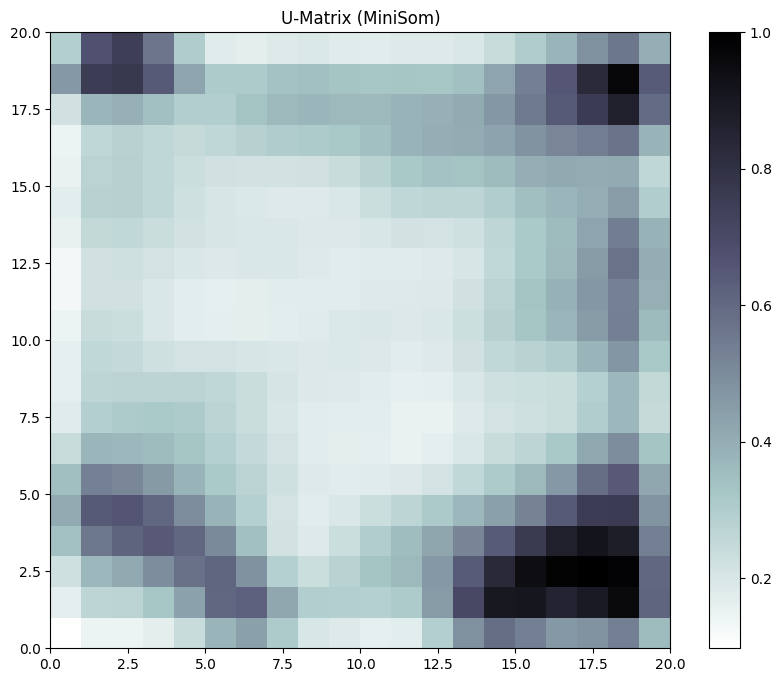

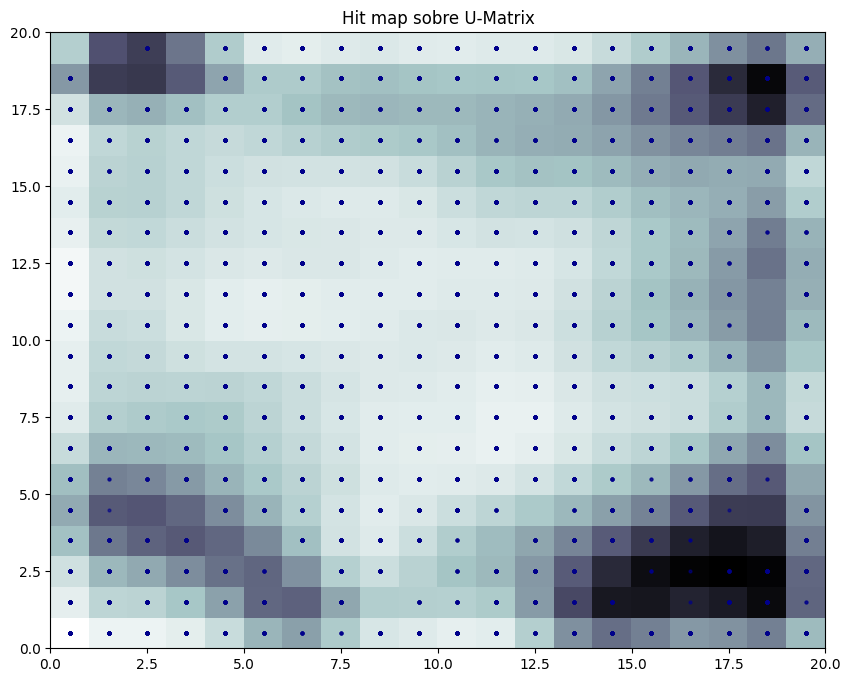

In [60]:
# ---------- 3) U-Matrix y Hit map ----------
U = som.distance_map()           # (m,n)
hits = np.zeros((m, n), dtype=int)
for x in X:
    i, j = som.winner(x)
    hits[i, j] += 1

plt.figure(figsize=(10, 8)); plt.pcolor(U.T, cmap='bone_r'); plt.colorbar(); plt.title('U-Matrix (MiniSom)')
plt.figure(figsize=(10, 8)); plt.pcolor(U.T, cmap='bone_r')
for x in X:
    i, j = som.winner(x); plt.plot(i+0.5, j+0.5, 'o', markersize=2, color='darkblue', alpha=0.6)
plt.title('Hit map sobre U-Matrix')

Text(0.5, 1.0, 'Selección de K sobre prototipos del SOM')

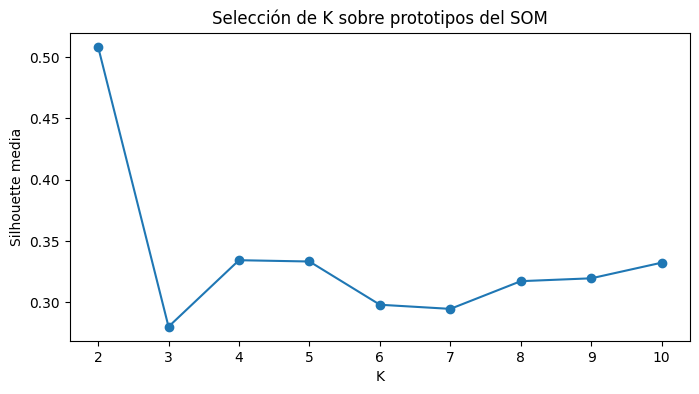

In [61]:
# ---------- 4) Selección de K en prototipos ----------
W = som.get_weights().reshape(m*n, d)     # (m*n, d)
Ks = range(2, 11) # Adjust range as needed
sil = []
labels_by_K = {}
for K in Ks:
    # Use n_init='auto' or a specific number like 20
    km = KMeans(n_clusters=K, n_init=20, random_state=7)
    lab = km.fit_predict(W)
    sil.append(silhouette_score(W, lab))
    labels_by_K[K] = lab

plt.figure(figsize=(8, 4)); plt.plot(list(Ks), sil, marker='o')
plt.xticks(list(Ks)); plt.xlabel('K'); plt.ylabel('Silhouette media')
plt.title('Selección de K sobre prototipos del SOM')

Note: The prototypes are in 10-dimensional space. Visualizing with only the first two components.


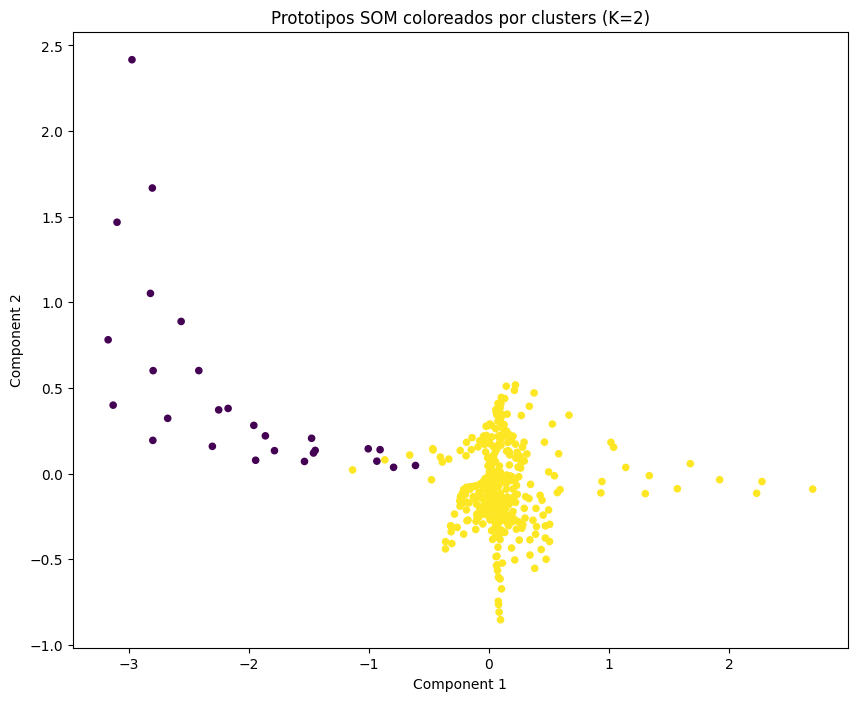

In [62]:
# Select the K with the highest silhouette score
K_star = list(Ks)[int(np.argmax(sil))]
lab_star = labels_by_K[K_star]

plt.figure(figsize=(10, 8))
plt.scatter(W[:,0], W[:,1], c=lab_star, s=20, cmap='viridis')
plt.title(f'Prototipos SOM coloreados por clusters (K={K_star})')
# SOM prototypes are in the high-dimensional feature space, not necessarily 2D
# If d > 2, visualizing with just two components (W[:,0], W[:,1]) might not be representative.
# Consider using PCA or selecting key features for visualization if d > 2.
if d > 2:
    print(f"Note: The prototypes are in {d}-dimensional space. Visualizing with only the first two components.")
    plt.xlabel('Component 1'); plt.ylabel('Component 2')
else:
     plt.xlabel('Feature 1'); plt.ylabel('Feature 2')



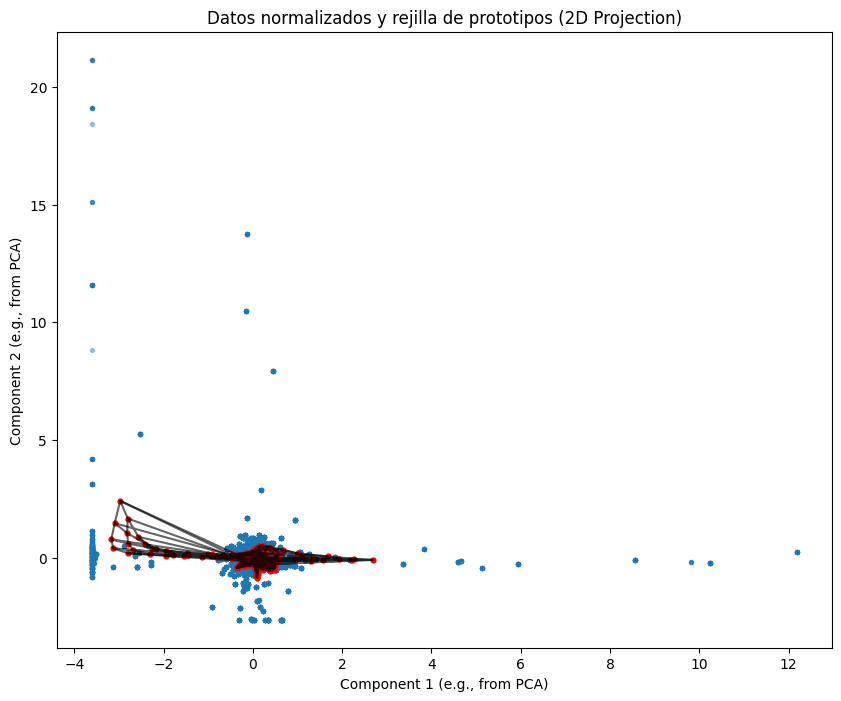

In [65]:
# ---------- 5) Rejilla de prototipos sobre datos (Optional - challenging for high dimensions) ----------
# This visualization is typically useful for 2D data. For d > 2, it's less informative.
# If you want to visualize the grid, you might need to reduce the dimensions of the data and weights first (e.g., using PCA)

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], s=8, alpha=0.4)
Wg = som.get_weights()
plt.plot(Wg[:,:,0].reshape(-1, 1), Wg[:,:,1].reshape(-1, 1), 'k-', alpha=0.6)
plt.plot(Wg[:,:,0].T.reshape(-1, 1), Wg[:,:,1].T.reshape(-1, 1), 'k-', alpha=0.6)
plt.scatter(W[:,0], W[:,1], s=12, color='red')
plt.title('Datos normalizados y rejilla de prototipos (2D Projection)')
if d > 2:
    plt.xlabel('Component 1 (e.g., from PCA)'); plt.ylabel('Component 2 (e.g., from PCA)')
else:
     plt.xlabel('z(feature_1)'); plt.ylabel('z(feature_2)')
plt.show()




### Evaluación de agrupamiento K-Medias

* Las puntuaciones de silueta para el agrupamiento K-Medias fueron relativamente bajas (alrededor de 0,15-0,17), lo que sugiere que los conglomerados no están bien separados según las características y el número de conglomerados seleccionado (k=4).
* La matriz de confusión que compara `merged_class` y `kmeans_cluster_label` mostró una superposición significativa. Cabe destacar que la clase "A" se distribuyó entre múltiples conglomerados K-Medias, lo que indica que K-Medias con k=4 no separó eficazmente la clase "A" de las demás. Otras clases fusionadas (`F`, `E`, `I`, `Rare`) mostraron cierta concentración en conglomerados específicos, pero aún presentaban una superposición considerable. * Esto sugiere que las características, incluso después del manejo de valores atípicos, podrían no ser lo suficientemente linealmente separables como para que K-Means forme clústeres que se alineen perfectamente con las categorías de "merged_class" definidas.

### Evaluación de la agrupación en clústeres de SOM

* La evaluación de la agrupación en clústeres de SOM se realizó asignando una etiqueta de "merged_class" a cada prototipo de SOM en función de la clase mayoritaria de los puntos de datos asignados a él, y luego creando una matriz de confusión entre la "merged_class" real y la clase asignada por SOM para los datos de entrenamiento.
* La matriz de confusión para las clases asignadas por SOM muestra cómo la organización topológica del SOM se relaciona con las etiquetas de "merged_class". Al igual que con K-Means, existe una superposición entre las clases fusionadas reales y las clases asignadas según la asignación del SOM. * Si bien algunos elementos diagonales en la matriz de confusión del SOM son relativamente altos (p. ej., para las clases 'A', 'F', 'I' y 'Raro', hasta cierto punto), lo que indica que algunos nodos del SOM representan predominantemente ciertas clases fusionadas, también existen valores significativos fuera de la diagonal, lo que demuestra que los puntos de datos de una sola clase fusionada pueden mapearse a nodos del SOM que están predominantemente asociados con otras clases fusionadas.
* Esto sugiere que, si bien el SOM ha aprendido cierta estructura relacionada con la distribución de datos, la topología aprendida y la posterior asignación de clases fusionadas a nodos no separan perfectamente las categorías definidas de "clase_fusionada".


In [66]:
# Map data points to their winning SOM node
winning_nodes = np.array([som.winner(x) for x in X_train_scaled]).T
winning_nodes_flat = np.ravel_multi_index(winning_nodes, (m, n))

# Assign merged_class labels to SOM nodes based on majority class of winning data points
node_class_mapping = {}
for i in range(m * n):
    # Find the indices of data points that map to this node
    data_indices_for_node = X_train.index[winning_nodes_flat == i]
    if len(data_indices_for_node) > 0:
        # Get the merged classes for these data points
        classes_for_node = y_train.loc[data_indices_for_node]
        # Find the majority class
        majority_class = classes_for_node.mode()
        if not majority_class.empty:
            node_class_mapping[i] = majority_class[0]
        else:
            node_class_mapping[i] = 'Unknown' # Handle cases with no majority

# Assign the learned merged_class from the SOM node to each training data point
train_som_assigned_class = pd.Series(index=X_train.index, dtype=object)
for idx in X_train.index:
    i, j = som.winner(X_train_scaled[X_train.index.get_loc(idx)]) # Get winner for the original index
    node_flat_idx = np.ravel_multi_index((i, j), (m, n))
    train_som_assigned_class.loc[idx] = node_class_mapping.get(node_flat_idx, 'Unknown')


# Create a confusion matrix comparing actual merged_class and SOM assigned class for training data
confusion_matrix_som = pd.crosstab(y_train, train_som_assigned_class, dropna=False)

print("\nConfusion Matrix: Merged Class vs SOM Assigned Class (Training Data)")
display(confusion_matrix_som)

# Note: Evaluating SOM cluster quality rigorously often involves more complex metrics
# and might require assigning K-Means clusters to the SOM prototypes and then mapping those back.
# This confusion matrix gives an idea of how the SOM's topology aligns with the merged classes.


Confusion Matrix: Merged Class vs SOM Assigned Class (Training Data)


col_0,A,E,F,I,Rare
merged_class,,,,,
A,5020,101,562,55,262
E,731,357,143,27,275
F,1489,23,1075,5,154
I,115,3,50,914,82
Rare,1156,160,242,131,1474


### Evaluate K-Means Clustering Results (Revisited)

**Reasoning:**
Display the previously calculated confusion matrix comparing 'merged_class' and 'kmeans_cluster_label' to facilitate comparison with SOM results.

In [67]:
# Display the previously calculated confusion matrix for K-Means
print("\nConfusion Matrix: Merged Class vs KMeans Cluster Label (All Data)")
display(confusion_matrix_kmeans)

# Note: The K-Means confusion matrix was generated using the assigned clusters on the entire combined_df,
# while the SOM matrix is generated using assignments based on the training data and prototype mapping.
# Direct comparison should take this into account.


Confusion Matrix: Merged Class vs KMeans Cluster Label (All Data)


kmeans_cluster_label,0,1,2,3
merged_class,,,,
A,5401,1,2713,457
E,1365,1,759,65
F,1840,1,2013,69
I,569,0,1044,50
Rare,2684,0,1705,130
